# Nifty Close Price Prediction(Using Neural Networks)

In [406]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [407]:
df = pd.read_csv('Nifty.csv')

In [408]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-12,3554.649902,3691.649902,3534.199951,3681.100098,3681.100098,0.0
1,2009-05-13,3668.750000,3709.600098,3610.199951,3635.250000,3635.250000,0.0
2,2009-05-14,3631.899902,3631.899902,3537.600098,3593.449951,3593.449951,0.0
3,2009-05-15,3597.850098,3686.250000,3597.850098,3671.649902,3671.649902,0.0
4,2009-05-18,3673.149902,4384.299805,3673.149902,4323.149902,4323.149902,0.0


In [409]:
df.shape

(3709, 7)

In [410]:
df.drop('Date', axis=1, inplace=True)

In [411]:
df

,Open,High,Low,Close,Adj Close,Volume
0,3554.649902,3691.649902,3534.199951,3681.100098,3681.100098,0.0
1,3668.750000,3709.600098,3610.199951,3635.250000,3635.250000,0.0
2,3631.899902,3631.899902,3537.600098,3593.449951,3593.449951,0.0
3,3597.850098,3686.250000,3597.850098,3671.649902,3671.649902,0.0
4,3673.149902,4384.299805,3673.149902,4323.149902,4323.149902,0.0
...,...,...,...,...,...,...
3704,22561.599609,22588.800781,22409.449219,22442.699219,22442.699219,320300.0
3705,22489.750000,22499.050781,22232.050781,22302.500000,22302.500000,297800.0
3706,22231.199219,22368.650391,22185.199219,22302.500000,22302.500000,277400.0
3707,22224.800781,22307.750000,21932.400391,21957.500000,21957.500000,331300.0


In [412]:
df.isnull().sum()

Open         28
High         28
Low          28
Close        28
Adj Close    28
Volume       28
dtype: int64

In [413]:
df.dropna(inplace=True)

In [414]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [415]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,3554.649902,3691.649902,3534.199951,3681.100098,3681.100098,0.0
1,3668.750000,3709.600098,3610.199951,3635.250000,3635.250000,0.0
2,3631.899902,3631.899902,3537.600098,3593.449951,3593.449951,0.0
3,3597.850098,3686.250000,3597.850098,3671.649902,3671.649902,0.0
4,3673.149902,4384.299805,3673.149902,4323.149902,4323.149902,0.0


## Data Visualization

<Axes: xlabel='High', ylabel='Low'>

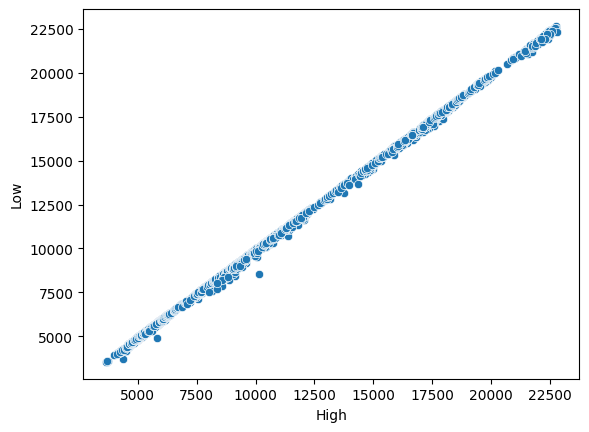

In [416]:
import seaborn as sns
sns.scatterplot(df, x=df['High'], y=df['Low'])

<Axes: xlabel='Volume', ylabel='Close'>

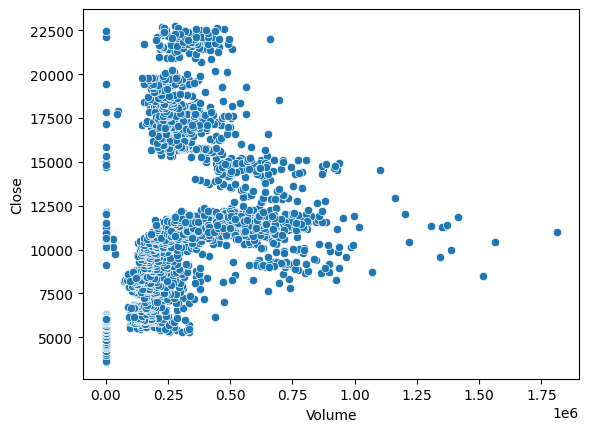

In [417]:
sns.scatterplot(df, x=df['Volume'], y=df['Close'])

## Splitting of Train and Test

In [418]:
X = df.drop('Close', axis=1)
y = df['Close']

In [419]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [420]:
#Scaling the train and test datasets so that the neural networks can train them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [421]:
X_train_scaled

array([[-0.31598844, -0.30929386, -0.3100082 , -0.29989211, -0.41733415],
       [-0.89740031, -0.89596151, -0.88957808, -0.89455692, -0.01771546],
       [-0.59514771, -0.59986299, -0.58869703, -0.59316927, -0.2335959 ],
       ...,
       [-0.83887091, -0.8426177 , -0.83480871, -0.83986614, -0.38279328],
       [-1.01202371, -1.0177746 , -1.00727417, -1.01405834, -1.07600937],
       [-0.95944717, -0.96582086, -1.00259935, -1.00716601,  0.12476563]])

In [422]:
X_train_scaled.shape

(2944, 5)

## Model Training(Using Neural Networks 4 hidden layers are there)

In [423]:
from keras.optimizers import Adam
from keras.losses import Huber

In [424]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer , loss='mean_squared_logarithmic_error')


C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [425]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59.2406 - val_loss: 15.0415
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3710 - val_loss: 4.6508
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8473 - val_loss: 1.8259
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5693 - val_loss: 0.8513
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7576 - val_loss: 0.4327
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4248 - val_loss: 0.2876
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3174 - val_loss: 0.2373
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2522 - val_loss: 0.2131
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2297 - val_loss: 0.1950
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2057 - val_loss: 0.1795
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1887 - val_loss: 0.1652
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

# Model Evaluation

In [434]:
min_values = {}
for key, value in history.history.items():
    min_values[key] = min(value)

print(min_values)

{'loss': 3.4638414945220575e-05, 'val_loss': 2.6299672754248604e-05}


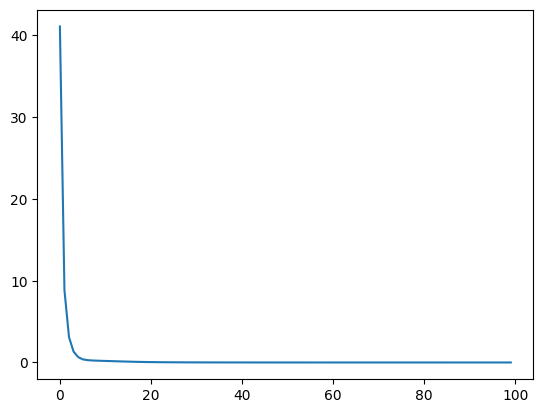

In [427]:
plt.plot(history.history['loss'])

In [428]:
y_pred = model.predict(X_train_scaled)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step


In [429]:
from sklearn.metrics import mean_squared_error

In [430]:
y_pred = model.predict(X_test_scaled)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [431]:
y_test = np.array(y_test).flatten()  # Ensure y_test is a 1D array
y_pred = np.array(y_pred).flatten()  # Ensure y_pred is a 1D array

In [432]:
df_pred = pd.DataFrame({'test_actual': y_test, 'test_pred': y_pred})

# Display the first few rows of the DataFrame
print(df_pred.head())

    test_actual     test_pred
0   9615.000000   9602.689453
1   8711.349609   8706.838867
2   7252.899902   7231.701172
3   8792.200195   8664.859375
4  10977.549805  10986.929688


<Axes: >

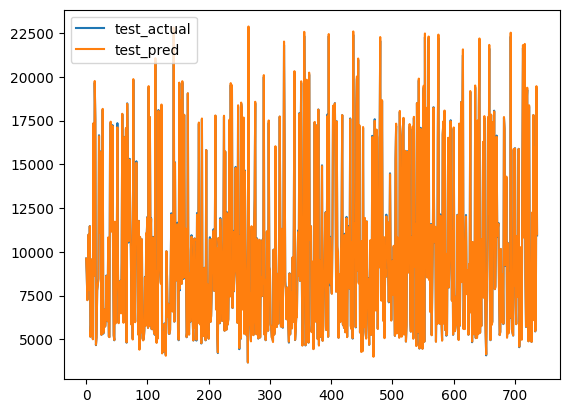

In [433]:
df_pred.plot(legend=True)